In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt 
import spacy
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from toolbox.complexity import complexity
from toolbox.quality import quality
from toolbox.generic import generic
from toolbox.readability import readability
from toolbox import model_utils as m_u
import pickle

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
df = pd.read_excel("training_set_rel3.xlsx")

In [3]:
df

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,17.0,18.0,NaN,35.0,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12974,21628,8,I never understood the meaning laughter is th...,15.0,17.0,NaN,32.0,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",20.0,26.0,40.0,40.0,NaN,NaN,NaN,...,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
12976,21630,8,Trippin' on fen...,20.0,20.0,NaN,40.0,NaN,NaN,NaN,...,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#df = df.iloc[:300, :]
selected_values = [1, 2, 3, 4, 5, 6, 7, 8]

df = pd.concat([df[df['essay_set'] == value].head(40) for value in selected_values])
df

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12290,20762,8,Laughter is always the key to complete happin...,15.0,17.0,NaN,32.0,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12291,20763,8,@ORGANIZATI...,19.0,20.0,40.0,40.0,NaN,NaN,NaN,...,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
12292,20764,8,` THE @CAPS1 @CAPS2 ...,15.0,15.0,NaN,30.0,NaN,NaN,NaN,...,4.0,4.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12293,20765,8,@CAPS9 you ever been scared so much that you ...,20.0,20.0,NaN,40.0,NaN,NaN,NaN,...,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dfx = df.copy(deep =True)
dfx

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12290,20762,8,Laughter is always the key to complete happin...,15.0,17.0,NaN,32.0,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12291,20763,8,@ORGANIZATI...,19.0,20.0,40.0,40.0,NaN,NaN,NaN,...,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
12292,20764,8,` THE @CAPS1 @CAPS2 ...,15.0,15.0,NaN,30.0,NaN,NaN,NaN,...,4.0,4.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12293,20765,8,@CAPS9 you ever been scared so much that you ...,20.0,20.0,NaN,40.0,NaN,NaN,NaN,...,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
dfx.isna().sum()

essay_id            0
essay_set           0
essay               0
rater1_domain1      0
rater2_domain1      0
rater3_domain1    312
domain1_score       0
rater1_domain2    280
rater2_domain2    280
domain2_score     280
rater1_trait1     240
rater1_trait2     240
rater1_trait3     240
rater1_trait4     240
rater1_trait5     280
rater1_trait6     280
rater2_trait1     240
rater2_trait2     240
rater2_trait3     240
rater2_trait4     240
rater2_trait5     280
rater2_trait6     280
rater3_trait1     312
rater3_trait2     312
rater3_trait3     312
rater3_trait4     312
rater3_trait5     312
rater3_trait6     312
dtype: int64

In [7]:
dfx.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
count,320.000000,320.000000,320.000000,320.000000,8.000000,320.000000,40.00000,40.000000,40.00000,80.000000,...,80.000000,80.000000,40.000000,40.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.00000
mean,10399.446875,4.500000,5.171875,5.181250,38.750000,9.053125,3.22500,3.300000,3.22500,2.712500,...,2.975000,3.037500,3.750000,3.600000,4.000000,4.000000,4.000000,4.000000,3.87500,3.75000
std,6799.195006,2.294876,5.471942,5.587011,5.849298,11.696541,0.80024,0.723241,0.80024,1.213779,...,1.232215,1.072602,0.669864,0.708918,0.755929,0.755929,0.755929,0.755929,0.64087,0.46291
min,1.000000,1.000000,0.000000,0.000000,30.000000,0.000000,1.00000,2.000000,1.00000,0.000000,...,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.00000
25%,5237.750000,2.750000,2.000000,2.000000,37.500000,2.000000,3.00000,3.000000,3.00000,2.000000,...,2.000000,2.000000,3.000000,3.000000,3.750000,3.750000,3.750000,3.750000,3.75000,3.75000
50%,10364.500000,4.500000,3.000000,3.000000,40.000000,3.000000,3.00000,3.000000,3.00000,3.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.00000
75%,15613.250000,6.250000,5.000000,5.000000,41.000000,10.000000,4.00000,4.000000,4.00000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.250000,4.250000,4.250000,4.250000,4.00000,4.00000
max,20766.000000,8.000000,25.000000,26.000000,46.000000,47.000000,4.00000,4.000000,4.00000,5.000000,...,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,4.00000


In [8]:
dfx

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12290,20762,8,Laughter is always the key to complete happin...,15.0,17.0,NaN,32.0,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12291,20763,8,@ORGANIZATI...,19.0,20.0,40.0,40.0,NaN,NaN,NaN,...,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
12292,20764,8,` THE @CAPS1 @CAPS2 ...,15.0,15.0,NaN,30.0,NaN,NaN,NaN,...,4.0,4.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12293,20765,8,@CAPS9 you ever been scared so much that you ...,20.0,20.0,NaN,40.0,NaN,NaN,NaN,...,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


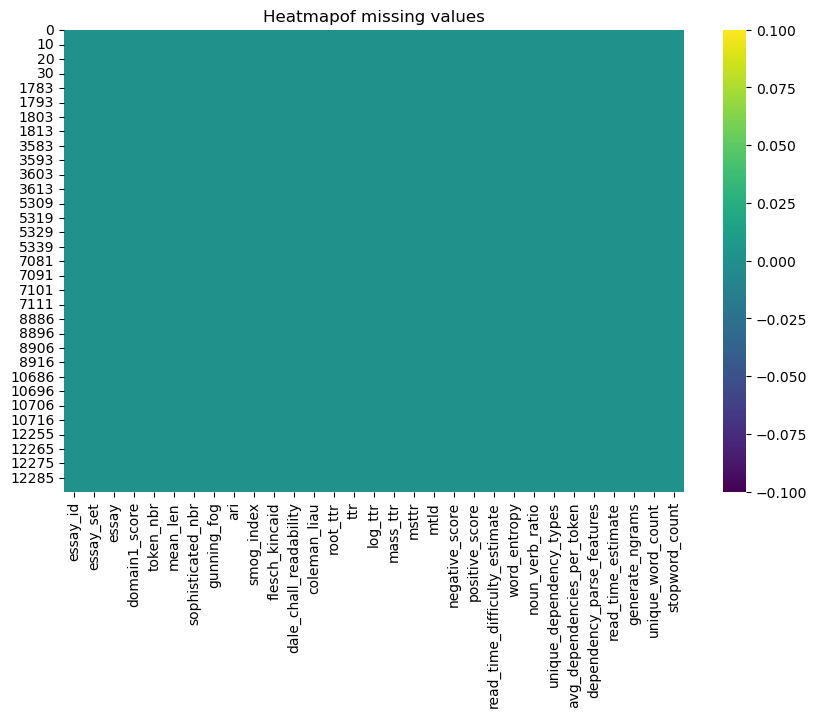

In [35]:
plt.figure(figsize=(10, 6))
sns.heatmap(dfx.isnull(), cmap='viridis', cbar=True)
plt.title('Heatmapof missing values')
plt.show()

## According to the distribution of missing values,
## So we will fill in the missing values in different columns of your DataFrame using the most frequent imputation strategy


In [10]:
#from sklearn.impute import SimpleImputer

#imputer = SimpleImputer(strategy='most_frequent')
#imputer.fit_transform(dfx['rater1_domain2'])
#imputer = SimpleImputer(strategy='most_frequent')
#dfx['rater1_domain2'] = imputer.fit_transform(dfx[['rater1_domain2']])
#dfx['rater1_domain1'] = imputer.fit_transform(dfx[['rater1_domain1']])
#dfx['rater2_domain1'] = imputer.fit_transform(dfx[['rater2_domain1']])
#dfx['rater3_domain1'] = imputer.fit_transform(dfx[['rater3_domain1']])
#dfx['rater2_domain2'] = imputer.fit_transform(dfx[['rater2_domain2']])
#dfx['domain2_score'] = imputer.fit_transform(dfx[['domain2_score']])
#dfx['domain1_score'] = imputer.fit_transform(dfx[['domain1_score']])
#dfx['rater1_trait1'] = imputer.fit_transform(dfx[['rater1_trait1']])
#dfx['rater1_trait2'] = imputer.fit_transform(dfx[['rater1_trait2']])
#dfx['rater1_trait3'] = imputer.fit_transform(dfx[['rater1_trait3']])
#dfx['rater1_trait4'] = imputer.fit_transform(dfx[['rater1_trait4']])
#dfx['rater1_trait5'] = imputer.fit_transform(dfx[['rater1_trait5']])
#dfx['rater1_trait6'] = imputer.fit_transform(dfx[['rater1_trait6']])
#dfx['rater2_trait1'] = imputer.fit_transform(dfx[['rater2_trait1']])
#dfx['rater2_trait2'] = imputer.fit_transform(dfx[['rater2_trait2']])
#dfx['rater2_trait3'] = imputer.fit_transform(dfx[['rater2_trait3']])
#dfx['rater2_trait4'] = imputer.fit_transform(dfx[['rater2_trait4']])
#dfx['rater2_trait5'] = imputer.fit_transform(dfx[['rater2_trait5']])
#dfx['rater2_trait6'] = imputer.fit_transform(dfx[['rater2_trait6']])
#dfx['rater3_trait1'] = imputer.fit_transform(dfx[['rater3_trait1']])
#dfx['rater3_trait2'] = imputer.fit_transform(dfx[['rater3_trait2']])
#dfx['rater3_trait3'] = imputer.fit_transform(dfx[['rater3_trait3']])
#dfx['rater3_trait4'] = imputer.fit_transform(dfx[['rater3_trait4']])
#dfx['rater3_trait5'] = imputer.fit_transform(dfx[['rater3_trait5']])
#dfx['rater3_trait6'] = imputer.fit_transform(dfx[['rater3_trait6']])
#dfx


In [11]:
dfx.columns

Index(['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'domain1_score', 'rater1_domain2', 'rater2_domain2',
       'domain2_score', 'rater1_trait1', 'rater1_trait2', 'rater1_trait3',
       'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait1',
       'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5',
       'rater2_trait6', 'rater3_trait1', 'rater3_trait2', 'rater3_trait3',
       'rater3_trait4', 'rater3_trait5', 'rater3_trait6'],
      dtype='object')

In [12]:
dfx

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12290,20762,8,Laughter is always the key to complete happin...,15.0,17.0,NaN,32.0,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12291,20763,8,@ORGANIZATI...,19.0,20.0,40.0,40.0,NaN,NaN,NaN,...,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
12292,20764,8,` THE @CAPS1 @CAPS2 ...,15.0,15.0,NaN,30.0,NaN,NaN,NaN,...,4.0,4.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12293,20765,8,@CAPS9 you ever been scared so much that you ...,20.0,20.0,NaN,40.0,NaN,NaN,NaN,...,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
comp, qual, gen,  reada = complexity(), quality(), generic(), readability()

In [14]:
dfx['token_nbr'] = dfx['essay'].apply(gen.get_token_nbr)
dfx['mean_len'] = dfx['essay'].apply(gen.get_mean_len)
dfx['sophisticated_nbr'] = dfx['essay'].apply(qual.get_sophisticated_nbr)
dfx['gunning_fog'] = dfx['essay'].apply(reada.g_fog)
dfx['ari'] = dfx['essay'].apply(reada.ari)
dfx['smog_index'] = dfx['essay'].apply(reada.smog_index)
dfx['flesch_kincaid'] = dfx['essay'].apply(reada.flesch_kincaid)
dfx['dale_chall_readability'] = dfx['essay'].apply(reada.dale_chall_readability)
dfx['coleman_liau'] = dfx['essay'].apply(comp.coleman_liau)
dfx['root_ttr'] = dfx['essay'].apply(comp.root_ttr)
dfx['ttr'] = dfx['essay'].apply(comp.ttr)
dfx['log_ttr'] = dfx['essay'].apply(comp.log_ttr)
dfx['mass_ttr'] = dfx['essay'].apply(comp.mass_ttr)
dfx['msttr'] = dfx['essay'].apply(comp.msttr)
dfx['mtld'] = dfx['essay'].apply(comp.mtld)
dfx['negative_score'] = dfx['essay'].apply(m_u.negative_score)
dfx['positive_score'] = dfx['essay'].apply(m_u.positive_score)
dfx['read_time_difficulty_estimate'] = dfx['essay'].apply(m_u.read_time_difficulty_estimate)
dfx['word_entropy'] = dfx['essay'].apply(m_u.word_entropy)
dfx['noun_verb_ratio'] = dfx['essay'].apply(m_u.noun_verb_ratio)
dfx['unique_dependency_types'] = dfx['essay'].apply(m_u.unique_dependency_types)
dfx['avg_dependencies_per_token'] = dfx['essay'].apply(m_u.avg_dependencies_per_token)
dfx['dependency_parse_features'] = dfx['essay'].apply(m_u.dependency_parse_features)
dfx['read_time_estimate'] = dfx['essay'].apply(m_u.read_time_estimate)
dfx['generate_ngrams'] = dfx['essay'].apply(m_u.generate_ngrams)
dfx['unique_word_count'] = dfx['essay'].apply(m_u.unique_word_count)
dfx['stopword_count'] = dfx['essay'].apply(m_u.stopword_count)
dfx

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,read_time_difficulty_estimate,word_entropy,noun_verb_ratio,unique_dependency_types,avg_dependencies_per_token,dependency_parse_features,read_time_estimate,generate_ngrams,unique_word_count,stopword_count
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,2,7.025773,1.540000,37,0.959494,379,1.690,385,184,176
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,9.0,NaN,NaN,NaN,...,2,7.265494,1.449275,33,0.956140,436,2.095,463,216,195
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,NaN,7.0,NaN,NaN,NaN,...,2,6.935586,1.775000,34,0.950980,291,1.395,312,167,143
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,NaN,10.0,NaN,NaN,NaN,...,2,7.464095,1.875000,34,0.953125,549,2.620,610,275,223
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,2,7.207449,1.816667,33,0.942085,488,2.325,516,226,241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12290,20762,8,Laughter is always the key to complete happin...,15.0,17.0,NaN,32.0,NaN,NaN,NaN,...,2,7.209884,0.942029,40,0.956023,500,2.275,516,226,250
12291,20763,8,@ORGANIZATI...,19.0,20.0,40.0,40.0,NaN,NaN,NaN,...,2,7.622736,1.208955,39,0.937908,861,4.230,966,359,438
12292,20764,8,` THE @CAPS1 @CAPS2 ...,15.0,15.0,NaN,30.0,NaN,NaN,NaN,...,2,6.686942,1.021739,32,0.962963,312,1.525,328,153,180
12293,20765,8,@CAPS9 you ever been scared so much that you ...,20.0,20.0,NaN,40.0,NaN,NaN,NaN,...,2,7.871191,1.021898,37,0.952236,937,4.235,1047,417,420


In [15]:
for i in dfx.index:
    current_value = dfx['read_time_difficulty_estimate'][i]

    if current_value == 'Easy':
        dfx.loc[i, 'read_time_difficulty_estimate'] = 0
    elif current_value == 0:
        dfx.loc[i, 'read_time_difficulty_estimate'] = 1
    else:
        dfx.loc[i, 'read_time_difficulty_estimate'] = 2
#dfx

In [16]:
dfx.index

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       12285, 12286, 12287, 12288, 12289, 12290, 12291, 12292, 12293, 12294],
      dtype='int64', length=320)

In [17]:
dfx[['essay_id', 'essay_set', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'domain1_score', 'rater1_domain2', 'rater2_domain2',
       'domain2_score', 'rater1_trait1', 'rater1_trait2', 'rater1_trait3',
       'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait1',
       'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5',
       'rater2_trait6', 'rater3_trait1', 'rater3_trait2', 'rater3_trait3',
       'rater3_trait4', 'rater3_trait5', 'rater3_trait6', 'token_nbr',
       'mean_len', 'sophisticated_nbr', 'gunning_fog',
       'ari', 'smog_index', 'flesch_kincaid', 'coleman_liau',
       'dale_chall_readability', 'root_ttr', 'ttr', 'log_ttr', 'mass_ttr',
       'msttr', 'mtld', 'negative_score', 'positive_score',
       'read_time_difficulty_estimate', 'word_entropy', 'noun_verb_ratio',
       'unique_dependency_types', 'avg_dependencies_per_token',
       'dependency_parse_features', 'read_time_estimate', 'generate_ngrams',
       'unique_word_count', 'stopword_count']].corr()

,essay_id,essay_set,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,read_time_difficulty_estimate,word_entropy,noun_verb_ratio,unique_dependency_types,avg_dependencies_per_token,dependency_parse_features,read_time_estimate,generate_ngrams,unique_word_count,stopword_count
essay_id,1.000000,0.999988,0.618468,0.622365,-0.258308,0.618738,0.089077,-0.045490,0.089077,0.798780,...,0.050298,0.069299,-0.138104,0.095222,-0.110229,0.175293,0.179972,0.194017,0.161219,0.193770
essay_set,0.999988,1.000000,0.618974,0.622974,NaN,0.619260,NaN,NaN,NaN,0.797981,...,0.050275,0.069868,-0.137923,0.095623,-0.109620,0.176459,0.181123,0.195155,0.162266,0.194858
rater1_domain1,0.618468,0.618974,1.000000,0.970943,0.797939,0.987911,0.773019,0.658555,0.773019,0.945082,...,0.113989,0.644194,-0.351279,0.585940,-0.157770,0.768178,0.768387,0.783131,0.769900,0.764673
rater2_domain1,0.622365,0.622974,0.970943,1.000000,0.445639,0.985210,0.823456,0.829609,0.823456,0.848035,...,0.107744,0.634332,-0.347920,0.588015,-0.167465,0.756656,0.758750,0.767667,0.753502,0.760296
rater3_domain1,-0.258308,NaN,0.797939,0.445639,1.000000,1.000000,NaN,NaN,NaN,0.791394,...,NaN,0.068830,-0.168284,0.073888,0.218044,0.285908,0.197076,0.195437,0.296463,-0.089784
domain1_score,0.618738,0.619260,0.987911,0.985210,1.000000,1.000000,0.773019,0.658555,0.773019,0.914911,...,0.097296,0.612021,-0.362325,0.559661,-0.174668,0.747701,0.749491,0.762527,0.746405,0.747402
rater1_domain2,0.089077,NaN,0.773019,0.823456,NaN,0.773019,1.000000,0.810743,1.000000,NaN,...,NaN,0.700241,0.116646,0.500866,-0.250620,0.483726,0.471323,0.480681,0.605311,0.415454
rater2_domain2,-0.045490,NaN,0.658555,0.829609,NaN,0.658555,0.810743,1.000000,0.810743,NaN,...,NaN,0.641389,0.193421,0.520644,-0.324605,0.451554,0.439066,0.440313,0.586326,0.387157
domain2_score,0.089077,NaN,0.773019,0.823456,NaN,0.773019,1.000000,0.810743,1.000000,NaN,...,NaN,0.700241,0.116646,0.500866,-0.250620,0.483726,0.471323,0.480681,0.605311,0.415454
rater1_trait1,0.798780,0.797981,0.945082,0.848035,0.791394,0.914911,NaN,NaN,NaN,1.000000,...,NaN,0.866129,-0.279644,0.809610,0.191585,0.850224,0.847434,0.849610,0.865726,0.827461


In [18]:
dfx.columns

Index(['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'domain1_score', 'rater1_domain2', 'rater2_domain2',
       'domain2_score', 'rater1_trait1', 'rater1_trait2', 'rater1_trait3',
       'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait1',
       'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5',
       'rater2_trait6', 'rater3_trait1', 'rater3_trait2', 'rater3_trait3',
       'rater3_trait4', 'rater3_trait5', 'rater3_trait6', 'token_nbr',
       'mean_len', 'sophisticated_nbr', 'gunning_fog', 'ari', 'smog_index',
       'flesch_kincaid', 'dale_chall_readability', 'coleman_liau', 'root_ttr',
       'ttr', 'log_ttr', 'mass_ttr', 'msttr', 'mtld', 'negative_score',
       'positive_score', 'read_time_difficulty_estimate', 'word_entropy',
       'noun_verb_ratio', 'unique_dependency_types',
       'avg_dependencies_per_token', 'dependency_parse_features',
       'read_time_estimate', 'generate_ngrams', 'uniqu

In [19]:
dfx = dfx.drop(['rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'rater1_domain2', 'rater2_domain2',
       'domain2_score', 'rater1_trait1', 'rater1_trait2', 'rater1_trait3',
       'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait1',
       'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5',
       'rater2_trait6', 'rater3_trait1', 'rater3_trait2', 'rater3_trait3',
       'rater3_trait4', 'rater3_trait5', 'rater3_trait6'], axis=1)
dfx

,essay_id,essay_set,essay,domain1_score,token_nbr,mean_len,sophisticated_nbr,gunning_fog,ari,smog_index,...,read_time_difficulty_estimate,word_entropy,noun_verb_ratio,unique_dependency_types,avg_dependencies_per_token,dependency_parse_features,read_time_estimate,generate_ngrams,unique_word_count,stopword_count
0,1,1,"Dear local newspaper, I think effects computer...",8.0,395,24.687500,59,10.31,11.3,10.2,...,2,7.025773,1.540000,37,0.959494,379,1.690,385,184,176
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0,456,22.800000,81,10.21,10.1,11.6,...,2,7.265494,1.449275,33,0.956140,436,2.095,463,216,195
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0,306,20.400000,53,10.25,9.9,12.0,...,2,6.935586,1.775000,34,0.950980,291,1.395,312,167,143
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10.0,576,21.333333,131,10.81,12.0,12.3,...,2,7.464095,1.875000,34,0.953125,549,2.620,610,275,223
4,5,1,"Dear @LOCATION1, I know having computers has a...",8.0,518,17.266667,87,8.01,7.7,11.1,...,2,7.207449,1.816667,33,0.942085,488,2.325,516,226,241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12290,20762,8,Laughter is always the key to complete happin...,32.0,523,22.739130,61,8.30,7.6,9.1,...,2,7.209884,0.942029,40,0.956023,500,2.275,516,226,250
12291,20763,8,@ORGANIZATI...,40.0,918,16.105263,89,7.64,6.2,7.9,...,2,7.622736,1.208955,39,0.937908,861,4.230,966,359,438
12292,20764,8,` THE @CAPS1 @CAPS2 ...,30.0,324,27.000000,33,17.89,18.3,10.3,...,2,6.686942,1.021739,32,0.962963,312,1.525,328,153,180
12293,20765,8,@CAPS9 you ever been scared so much that you ...,40.0,984,20.936170,175,8.60,9.1,8.8,...,2,7.871191,1.021898,37,0.952236,937,4.235,1047,417,420


In [20]:
dfx['domain1_score'] = df['domain1_score']
dfa = dfx.copy(deep=True)
dfa

,essay_id,essay_set,essay,domain1_score,token_nbr,mean_len,sophisticated_nbr,gunning_fog,ari,smog_index,...,read_time_difficulty_estimate,word_entropy,noun_verb_ratio,unique_dependency_types,avg_dependencies_per_token,dependency_parse_features,read_time_estimate,generate_ngrams,unique_word_count,stopword_count
0,1,1,"Dear local newspaper, I think effects computer...",8.0,395,24.687500,59,10.31,11.3,10.2,...,2,7.025773,1.540000,37,0.959494,379,1.690,385,184,176
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0,456,22.800000,81,10.21,10.1,11.6,...,2,7.265494,1.449275,33,0.956140,436,2.095,463,216,195
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0,306,20.400000,53,10.25,9.9,12.0,...,2,6.935586,1.775000,34,0.950980,291,1.395,312,167,143
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10.0,576,21.333333,131,10.81,12.0,12.3,...,2,7.464095,1.875000,34,0.953125,549,2.620,610,275,223
4,5,1,"Dear @LOCATION1, I know having computers has a...",8.0,518,17.266667,87,8.01,7.7,11.1,...,2,7.207449,1.816667,33,0.942085,488,2.325,516,226,241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12290,20762,8,Laughter is always the key to complete happin...,32.0,523,22.739130,61,8.30,7.6,9.1,...,2,7.209884,0.942029,40,0.956023,500,2.275,516,226,250
12291,20763,8,@ORGANIZATI...,40.0,918,16.105263,89,7.64,6.2,7.9,...,2,7.622736,1.208955,39,0.937908,861,4.230,966,359,438
12292,20764,8,` THE @CAPS1 @CAPS2 ...,30.0,324,27.000000,33,17.89,18.3,10.3,...,2,6.686942,1.021739,32,0.962963,312,1.525,328,153,180
12293,20765,8,@CAPS9 you ever been scared so much that you ...,40.0,984,20.936170,175,8.60,9.1,8.8,...,2,7.871191,1.021898,37,0.952236,937,4.235,1047,417,420


In [21]:
dfa1 = dfa[dfa.essay_set == 1]
dfa2 = dfa[dfa.essay_set == 2]
dfa3 = dfa[dfa.essay_set == 3]
dfa4 = dfa[dfa.essay_set == 4]
dfa5 = dfa[dfa.essay_set == 5]
dfa6 = dfa[dfa.essay_set == 6]
dfa7 = dfa[dfa.essay_set == 7]
dfa8 = dfa[dfa.essay_set == 8]


In [22]:
dfa.columns

Index(['essay_id', 'essay_set', 'essay', 'domain1_score', 'token_nbr',
       'mean_len', 'sophisticated_nbr', 'gunning_fog', 'ari', 'smog_index',
       'flesch_kincaid', 'dale_chall_readability', 'coleman_liau', 'root_ttr',
       'ttr', 'log_ttr', 'mass_ttr', 'msttr', 'mtld', 'negative_score',
       'positive_score', 'read_time_difficulty_estimate', 'word_entropy',
       'noun_verb_ratio', 'unique_dependency_types',
       'avg_dependencies_per_token', 'dependency_parse_features',
       'read_time_estimate', 'generate_ngrams', 'unique_word_count',
       'stopword_count'],
      dtype='object')

In [23]:
dfa.isna().sum()

essay_id                         0
essay_set                        0
essay                            0
domain1_score                    0
token_nbr                        0
mean_len                         0
sophisticated_nbr                0
gunning_fog                      0
ari                              0
smog_index                       0
flesch_kincaid                   0
dale_chall_readability           0
coleman_liau                     0
root_ttr                         0
ttr                              0
log_ttr                          0
mass_ttr                         0
msttr                            0
mtld                             0
negative_score                   0
positive_score                   0
read_time_difficulty_estimate    0
word_entropy                     0
noun_verb_ratio                  0
unique_dependency_types          0
avg_dependencies_per_token       0
dependency_parse_features        0
read_time_estimate               0
generate_ngrams     

In [24]:
dfa1['domain1_score'] = (dfa1['domain1_score'] - dfa1['domain1_score'].min()) / (dfa1['domain1_score'].max() - dfa1['domain1_score'].min()) * (10 - 1) + 1
dfa1['domain1_score'] = dfa1['domain1_score'].round().astype(int)

dfa2['domain1_score'] = (dfa2['domain1_score'] - dfa2['domain1_score'].min()) / (dfa2['domain1_score'].max() - dfa2['domain1_score'].min()) * (10 - 1) + 1
dfa2['domain1_score'] = dfa2['domain1_score'].round().astype(int)

dfa3['domain1_score'] = (dfa3['domain1_score'] - dfa3['domain1_score'].min()) / (dfa3['domain1_score'].max() - dfa3['domain1_score'].min()) * (10 - 1) + 1
dfa3['domain1_score'] = dfa3['domain1_score'].round().astype(int)

dfa4['domain1_score'] = (dfa4['domain1_score'] - dfa4['domain1_score'].min()) / (dfa4['domain1_score'].max() - dfa4['domain1_score'].min()) * (10 - 1) + 1
dfa4['domain1_score'] = dfa4['domain1_score'].round().astype(int)

dfa5['domain1_score'] = (dfa5['domain1_score'] - dfa5['domain1_score'].min()) / (dfa5['domain1_score'].max() - dfa5['domain1_score'].min()) * (10 - 1) + 1
dfa5['domain1_score'] = dfa5['domain1_score'].round().astype(int)

dfa6['domain1_score'] = (dfa6['domain1_score'] - dfa6['domain1_score'].min()) / (dfa6['domain1_score'].max() - dfa6['domain1_score'].min()) * (10 - 1) + 1
dfa6['domain1_score'] = dfa6['domain1_score'].round().astype(int)

dfa7['domain1_score'] = (dfa7['domain1_score'] - dfa7['domain1_score'].min()) / (dfa7['domain1_score'].max() - dfa7['domain1_score'].min()) * (10 - 1) + 1
dfa7['domain1_score'] = dfa7['domain1_score'].round().astype(int)

dfa8['domain1_score'] = (dfa8['domain1_score'] - dfa8['domain1_score'].min()) / (dfa8['domain1_score'].max() - dfa8['domain1_score'].min()) * (10 - 1) + 1
dfa8['domain1_score'] = dfa8['domain1_score'].round().astype(int)


C:\Users\HP\AppData\Local\Temp\ipykernel_15568\3808060173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa1['domain1_score'] = (dfa1['domain1_score'] - dfa1['domain1_score'].min()) / (dfa1['domain1_score'].max() - dfa1['domain1_score'].min()) * (10 - 1) + 1
C:\Users\HP\AppData\Local\Temp\ipykernel_15568\3808060173.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa1['domain1_score'] = dfa1['domain1_score'].round().astype(int)
C:\Users\HP\AppData\Local\Temp\ipykernel_15568\3808060173.py:4: Setting

In [25]:
dfr = pd.concat([dfa1, dfa2, dfa3, dfa4, dfa5, dfa6, dfa7, dfa8], ignore_index=True)
#dfr = dfa1

In [26]:
dfr.columns

Index(['essay_id', 'essay_set', 'essay', 'domain1_score', 'token_nbr',
       'mean_len', 'sophisticated_nbr', 'gunning_fog', 'ari', 'smog_index',
       'flesch_kincaid', 'dale_chall_readability', 'coleman_liau', 'root_ttr',
       'ttr', 'log_ttr', 'mass_ttr', 'msttr', 'mtld', 'negative_score',
       'positive_score', 'read_time_difficulty_estimate', 'word_entropy',
       'noun_verb_ratio', 'unique_dependency_types',
       'avg_dependencies_per_token', 'dependency_parse_features',
       'read_time_estimate', 'generate_ngrams', 'unique_word_count',
       'stopword_count'],
      dtype='object')

In [27]:
Res = dfr.copy(deep=True)
y = Res['domain1_score']
X = Res.drop(['essay_id', 'essay', 'essay_set', 'domain1_score'], axis=1).copy()

X

,token_nbr,mean_len,sophisticated_nbr,gunning_fog,ari,smog_index,flesch_kincaid,dale_chall_readability,coleman_liau,root_ttr,...,read_time_difficulty_estimate,word_entropy,noun_verb_ratio,unique_dependency_types,avg_dependencies_per_token,dependency_parse_features,read_time_estimate,generate_ngrams,unique_word_count,stopword_count
0,395,24.687500,59,10.31,11.3,10.2,8.5,7.00,8.54,8.388915,...,2,7.025773,1.540000,37,0.959494,379,1.690,385,184,176
1,456,22.800000,81,10.21,10.1,11.6,9.1,7.28,7.95,8.647016,...,2,7.265494,1.449275,33,0.956140,436,2.095,463,216,195
2,306,20.400000,53,10.25,9.9,12.0,8.7,7.62,8.30,7.962502,...,2,6.935586,1.775000,34,0.950980,291,1.395,312,167,143
3,576,21.333333,131,10.81,12.0,12.3,9.7,8.34,10.97,10.134967,...,2,7.464095,1.875000,34,0.953125,549,2.620,610,275,223
4,518,17.266667,87,8.01,7.7,11.1,7.0,6.51,8.00,8.347300,...,2,7.207449,1.816667,33,0.942085,488,2.325,516,226,241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,523,22.739130,61,8.30,7.6,9.1,7.2,6.18,6.04,8.382443,...,2,7.209884,0.942029,40,0.956023,500,2.275,516,226,250
316,918,16.105263,89,7.64,6.2,7.9,6.2,6.23,5.39,9.563491,...,2,7.622736,1.208955,39,0.937908,861,4.230,966,359,438
317,324,27.000000,33,17.89,18.3,10.3,15.5,7.61,5.30,7.317273,...,2,6.686942,1.021739,32,0.962963,312,1.525,328,153,180
318,984,20.936170,175,8.60,9.1,8.8,7.8,7.51,7.71,11.538287,...,2,7.871191,1.021898,37,0.952236,937,4.235,1047,417,420


In [28]:
y




0      6
1      7
2      5
3      8
4      6
      ..
315    5
316    8
317    4
318    8
319    9
Name: domain1_score, Length: 320, dtype: int32

In [29]:

dfr

,essay_id,essay_set,essay,domain1_score,token_nbr,mean_len,sophisticated_nbr,gunning_fog,ari,smog_index,...,read_time_difficulty_estimate,word_entropy,noun_verb_ratio,unique_dependency_types,avg_dependencies_per_token,dependency_parse_features,read_time_estimate,generate_ngrams,unique_word_count,stopword_count
0,1,1,"Dear local newspaper, I think effects computer...",6,395,24.687500,59,10.31,11.3,10.2,...,2,7.025773,1.540000,37,0.959494,379,1.690,385,184,176
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",7,456,22.800000,81,10.21,10.1,11.6,...,2,7.265494,1.449275,33,0.956140,436,2.095,463,216,195
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",5,306,20.400000,53,10.25,9.9,12.0,...,2,6.935586,1.775000,34,0.950980,291,1.395,312,167,143
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",8,576,21.333333,131,10.81,12.0,12.3,...,2,7.464095,1.875000,34,0.953125,549,2.620,610,275,223
4,5,1,"Dear @LOCATION1, I know having computers has a...",6,518,17.266667,87,8.01,7.7,11.1,...,2,7.207449,1.816667,33,0.942085,488,2.325,516,226,241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,20762,8,Laughter is always the key to complete happin...,5,523,22.739130,61,8.30,7.6,9.1,...,2,7.209884,0.942029,40,0.956023,500,2.275,516,226,250
316,20763,8,@ORGANIZATI...,8,918,16.105263,89,7.64,6.2,7.9,...,2,7.622736,1.208955,39,0.937908,861,4.230,966,359,438
317,20764,8,` THE @CAPS1 @CAPS2 ...,4,324,27.000000,33,17.89,18.3,10.3,...,2,6.686942,1.021739,32,0.962963,312,1.525,328,153,180
318,20765,8,@CAPS9 you ever been scared so much that you ...,8,984,20.936170,175,8.60,9.1,8.8,...,2,7.871191,1.021898,37,0.952236,937,4.235,1047,417,420


In [30]:
dfr.columns

Index(['essay_id', 'essay_set', 'essay', 'domain1_score', 'token_nbr',
       'mean_len', 'sophisticated_nbr', 'gunning_fog', 'ari', 'smog_index',
       'flesch_kincaid', 'dale_chall_readability', 'coleman_liau', 'root_ttr',
       'ttr', 'log_ttr', 'mass_ttr', 'msttr', 'mtld', 'negative_score',
       'positive_score', 'read_time_difficulty_estimate', 'word_entropy',
       'noun_verb_ratio', 'unique_dependency_types',
       'avg_dependencies_per_token', 'dependency_parse_features',
       'read_time_estimate', 'generate_ngrams', 'unique_word_count',
       'stopword_count'],
      dtype='object')

In [31]:
y = dfr['domain1_score']
X = dfr.drop(['essay_id', 'read_time_difficulty_estimate', 'avg_dependencies_per_token', 'essay_set','essay', 'domain1_score'], axis=1).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xg_reg = xgb.XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=500, objective='reg:squarederror')

xg_reg.fit(X_train, y_train)

y_pred = xg_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

feature_importances = xg_reg.feature_importances_
print('Feature Importances:')
for feature, importance in zip(X.columns, feature_importances):
    print(f'{feature}: {importance}')

threshold = 1.5

good_predictions = sum(abs(y_test - y_pred) <= threshold)
total_predictions = len(y_test)
percentage_good_predictions = (good_predictions / total_predictions) * 100

print(f'Percentage of predictions within the threshold ({threshold}): {percentage_good_predictions:.2f}%')

Mean Squared Error: 4.454997774635662
Feature Importances:
token_nbr: 0.010859815403819084
mean_len: 0.015414778143167496
sophisticated_nbr: 0.05870332196354866
gunning_fog: 0.026347210630774498
ari: 0.011207341216504574
smog_index: 0.025637881830334663
flesch_kincaid: 0.010045887902379036
dale_chall_readability: 0.024228831753134727
coleman_liau: 0.045625198632478714
root_ttr: 0.10159938037395477
ttr: 0.041944656521081924
log_ttr: 0.0102158198133111
mass_ttr: 0.033553190529346466
msttr: 0.01570313051342964
mtld: 0.019921407103538513
negative_score: 0.01870257779955864
positive_score: 0.03475773707032204
word_entropy: 0.19499514997005463
noun_verb_ratio: 0.019400738179683685
unique_dependency_types: 0.017069002613425255
dependency_parse_features: 0.029022183269262314
read_time_estimate: 0.06657695025205612
generate_ngrams: 0.045290276408195496
unique_word_count: 0.09812650084495544
stopword_count: 0.025050964206457138
Percentage of predictions within the threshold (1.5): 59.38%


In [32]:
X.columns

Index(['token_nbr', 'mean_len', 'sophisticated_nbr', 'gunning_fog', 'ari',
       'smog_index', 'flesch_kincaid', 'dale_chall_readability',
       'coleman_liau', 'root_ttr', 'ttr', 'log_ttr', 'mass_ttr', 'msttr',
       'mtld', 'negative_score', 'positive_score', 'word_entropy',
       'noun_verb_ratio', 'unique_dependency_types',
       'dependency_parse_features', 'read_time_estimate', 'generate_ngrams',
       'unique_word_count', 'stopword_count'],
      dtype='object')

In [33]:
essay_example = "Dear local newspaper, I think effects computers have on people are great learning skills/affects because they give us time to chat with friends/new people, helps us learn about the globe(astronomy) and keeps us out of troble! Thing about! Dont you think so? How would you feel if your teenager is always on the phone with friends! Do you ever time to chat with your friends or buisness partner about things. Well now - there's a new way to chat the computer, theirs plenty of sites on the internet to do so: @ORGANIZATION1, @ORGANIZATION2, @CAPS1, facebook, myspace ect. Just think now while your setting up meeting with your boss on the computer, your teenager is having fun on the phone not rushing to get off cause you want to use it. How did you learn about other countrys/states outside of yours? Well I have by computer/internet, it's a new way to learn about what going on in our time! You might think your child spends a lot of time on the computer, but ask them so question about the economy, sea floor spreading or even about the @DATE1's you'll be surprise at how much he/she knows. Believe it or not the computer is much interesting then in class all day reading out of books. If your child is home on your computer or at a local library, it's better than being out with friends being fresh, or being perpressured to doing something they know isnt right. You might not know where your child is, @CAPS2 forbidde in a hospital bed because of a drive-by. Rather than your child on the computer learning, chatting or just playing games, safe and sound in your home or community place. Now I hope you have reached a point to understand and agree with me, because computers can have great effects on you or child because it gives us time to chat with friends/new people, helps us learn about the globe and believe or not keeps us out of troble. Thank you for listening."
print(m_u.get_prediction(essay_example, xg_reg, gen, reada, qual, comp))

5.0994334


385
